# Home Vs Away Stats

In [14]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import re

from scipy import stats
from pandas.plotting import register_matplotlib_converters

from statsmodels.nonparametric.smoothers_lowess import lowess
from pykalman import KalmanFilter

from sklearn.linear_model import LinearRegression


In [22]:
filename = 'games_2017.csv'
df = pd.read_csv(filename)

In [23]:
# df = df.groupby('home')

In [48]:
# of games home team won
home_wins = df[df['homescore'] > df['awayscore']].shape[0]

# of games away team won
away_wins =  df[df['homescore'] < df['awayscore']].shape[0]
xa = df['homescore']
xb = df['awayscore']

xa_mean = xa.mean()
xb_mean = xb.mean()
print(xa_mean)
print(xb_mean)

22.9609375
20.4765625


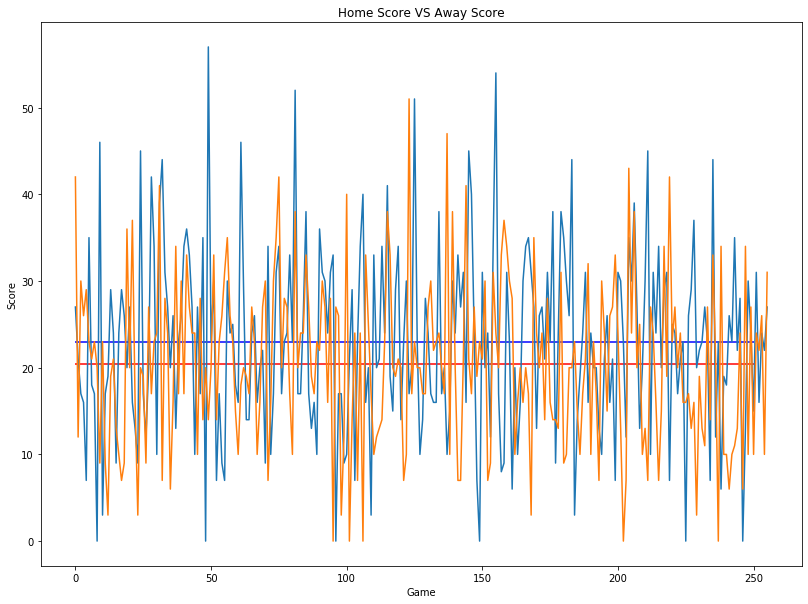

In [45]:
plt.figure(figsize=(30, 10)) 	# size of figure
plt.subplot(1,2,1) 		# subplots in 1 row, 2 columns, select the first
plt.plot( np.arange(len(xa)), xa,xb) # build plot 1
plt.xlabel('Game')
plt.ylabel('Score')
plt.title('Home Score VS Away Score')
plt.hlines(xa_mean,0,250,colors='b')
plt.hlines(xb_mean,0,250,colors='r')

In [126]:
df.groupby('home').agg('homescore').describe()

,count,mean,std,min,25%,50%,75%,max
home,,,,,,,,
ARI,8.0,20.875,8.322731,12.0,16.00,17.5,24.00,38.0
ATL,8.0,22.500,8.734169,9.0,17.00,21.0,28.75,34.0
BAL,8.0,26.750,10.898886,9.0,23.00,24.0,30.25,44.0
BUF,8.0,20.125,10.602392,3.0,12.25,22.5,27.00,34.0
CAR,8.0,24.250,11.373528,9.0,18.25,22.5,31.00,45.0
CHI,8.0,18.500,3.505098,14.0,16.75,17.0,20.75,24.0
CIN,8.0,17.000,10.488088,0.0,8.50,20.0,24.50,30.0
CLE,8.0,12.750,5.284749,7.0,8.50,12.0,16.50,21.0
DAL,8.0,21.625,11.770878,6.0,11.25,23.5,30.25,38.0


In [28]:
ttest = stats.ttest_ind(xa,xb)
print(ttest)
print(ttest.statistic)
print(ttest.pvalue)

# CONCLUSION Since P < 0.05, we can reject the null hypothesis and say that there is a
# difference between average home scores vs average away scores

Ttest_indResult(statistic=2.7641131550773905, pvalue=0.005914285181053104)
2.7641131550773905
0.005914285181053104


In [29]:
print(stats.normaltest(xa).pvalue)
print(stats.normaltest(xb).pvalue)

# Since both p-values are > 0.05, we accept the null hypothesis 
# Both average scores are normally distributed

0.1493387222008348
0.24410200669211737


In [31]:
print(stats.levene(xa, xb).pvalue)

# Since p-value > 0.05, we accept the null hypothesis 
# Both groups have equal variance

0.17413749574119036
